In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

df = pd.read_stata('BES2019_W16_v0.2.dta',columns=['lr_scale','al_scale','profile_past_vote_2017','profile_eurefvote','wt_fresh_','al1','al2','al3','al4','al5','lr1','lr2','lr3','lr4','lr5','redistSelf','ns_sec_analytic','EUIntegrationSelf'])

df['lr'] = df['lr_scale'].cat.codes.replace(-1,np.nan)/2
df['al'] = df['al_scale'].cat.codes.replace(-1,np.nan)/2
df['redist'] = df['redistSelf'].cat.codes.replace(11,np.nan)+1
df['eu'] = df['EUIntegrationSelf'].cat.codes.replace(11,np.nan)

for i in ['lr','al','redist','eu']:
    df[i] = (df[i]-np.mean(df[i]))/np.std(df[i])

df['occ_class'] = df['ns_sec_analytic'].replace(['Employers in large organisations and higher managerial','Higher professional occupations','Lower professional and managerial and higher supervisory','Intermediate occupations','Employers in small organisations and own account workers','Lower supervisory and technical occupations','Semi-routine occupations','Routine occupations','Never worked'],['I','I','II','III','IV','V','VI','VII',np.nan])
df['occ_class'] = df['occ_class'].astype('category').cat.reorder_categories(['I','II','III','IV','V','VI','VII'])

df['wt'] = df['wt_fresh_']

df.head()

,lr_scale,al_scale,profile_past_vote_2017,profile_eurefvote,wt_fresh_,al1,al2,al3,al4,al5,...,lr5,redistSelf,ns_sec_analytic,EUIntegrationSelf,lr,al,redist,eu,occ_class,wt
0,2.5,6,Labour,Leave the EU,NaN,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,Agree,5,Semi-routine occupations,Protect our independence,-0.340240,-0.141723,0.247979,1.162782,VI,NaN
1,2.5,Authoritarian,Scottish National Party (SNP),Stay/remain in the EU,NaN,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,4,Lower supervisory and technical occupations,Unite fully with the European Union,-0.340240,1.642907,-0.083135,-1.449136,V,NaN
2,5,6,Conservative,Leave the EU,NaN,Disagree,Agree,Agree,Neither agree nor disagree,Agree,...,Neither agree nor disagree,Don't know,NaN,9,0.920035,-0.141723,NaN,0.901590,NaN,NaN
3,5.5,4,Conservative,Leave the EU,NaN,Disagree,Disagree,Agree,Strongly disagree,Agree,...,Neither agree nor disagree,Government should be less concerned about equa...,Higher professional occupations,Protect our independence,1.172090,-1.034037,1.903550,1.162782,I,NaN
4,Left,Libertarian,Scottish National Party (SNP),Stay/remain in the EU,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,...,Strongly agree,Government should try to make incomes equal,NaN,Unite fully with the European Union,-1.600515,-2.818666,-1.407591,-1.449136,NaN,NaN


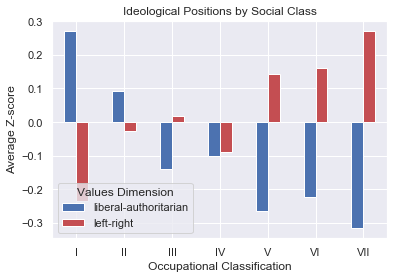

In [28]:
df['lr_wt'] = -df['lr']*df['wt']
df['al_wt'] = -df['al']*df['wt']

table = pd.pivot_table(df,index='occ_class',values=['lr_wt','al_wt'],aggfunc='sum').div(pd.pivot_table(df,index='occ_class',values='wt',aggfunc='sum')['wt'],axis=0)
table = table.rename(columns={'lr_wt':'left-right','al_wt':'liberal-authoritarian'})
table.plot.bar(color=['C0','C3'])
plt.xticks(rotation=0)
plt.xlabel('Occupational Classification')
plt.ylabel('Average Z-score')
plt.legend(title='Values Dimension',loc='lower left')
plt.title('Ideological Positions by Social Class')
plt.savefig('class_values_2019.png',dpi=200)

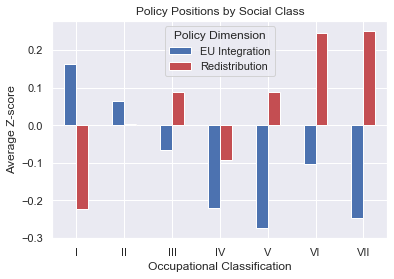

In [40]:
df['redist_wt'] = -df['redist']*df['wt']
df['eu_wt'] = -df['eu']*df['wt']

table = pd.pivot_table(df,index='occ_class',values=['redist_wt','eu_wt'],aggfunc='sum').div(pd.pivot_table(df,index='occ_class',values='wt',aggfunc='sum')['wt'],axis=0)
table = table.rename(columns={'redist_wt':'Redistribution','eu_wt':'EU Integration'})
table.plot.bar(color=['C0','C3'])
plt.xticks(rotation=0)
plt.xlabel('Occupational Classification')
plt.ylabel('Average Z-score')
plt.legend(title='Policy Dimension')
plt.title('Policy Positions by Social Class')
plt.savefig('class_policy_2019.png',dpi=200)